In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
from IPython import display
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] =  ['SimHei']
plt.rcParams['axes.unicode_minus'] =  False

# 数据探索

In [2]:
file_path=r'附件1'
file_names = os.listdir(file_path)
file_names

['YD1.xlsx',
 'YD10.xlsx',
 'YD11.xlsx',
 'YD2.xlsx',
 'YD3.xlsx',
 'YD4.xlsx',
 'YD5.xlsx',
 'YD6.xlsx',
 'YD7.xlsx',
 'YD8.xlsx',
 'YD9.xlsx']

In [3]:
# 读取11个文件中的【设备数据】
tmp_sb = pd.DataFrame([])
for file_name in file_names:
    # 读取数据
    tmp = pd.read_excel(os.path.join(file_path,file_name), sheet_name='设备数据')
    # 添加字段
    tmp['yd_type'] =  file_name.split('.')[0]
    # 拼接数据
    tmp_sb = pd.concat([tmp_sb, tmp], axis=0)
print(tmp_sb.shape)
tmp_sb.head()

(4236, 11)


,time,IC,UC,PC,QC,PFC,P,Q,PF,label,yd_type
0,2018-01-25 14:55:44,9,2222,3,0,184,3,0,184,0,YD1
1,2018-01-25 14:55:45,9,2223,3,0,150,3,0,150,0,YD1
2,2018-01-25 14:55:46,9,2224,2,0,139,2,0,139,0,YD1
3,2018-01-25 14:55:47,9,2224,3,0,160,3,0,160,0,YD1
4,2018-01-25 14:55:48,9,2223,3,0,142,3,0,142,0,YD1


In [4]:
# 自定义函数加载所有文件的【设备数据】、【周波数据】、【谐波数据】、【操作记录】
def get_files(file_path='./附件1/'):
    file_names = os.listdir(file_path)
    # 1 获取单个工作簿中所有子表名称
    f = pd.ExcelFile(file_path + file_names[0], engine='openpyxl')
    sheet_names = f.sheet_names
    # 2 循环获取数据
    # 一类数据为一个键值对
    all_data = {sheet_name: pd.DataFrame([]) for sheet_name in sheet_names}

    for file_name in file_names:  # 循环11个文件
        for sheet_name in sheet_names:  # 循环4个子表
            # 读取数据
            tmp = pd.read_excel(file_path + file_name, sheet_name=sheet_name, engine='openpyxl')
            # 添加字段
            tmp['yd_type'] = file_name.split('.')[0]
            # 拼接数据
            all_data[sheet_name] = pd.concat([all_data[sheet_name], tmp])
    return all_data

In [5]:
all_data = get_files('附件1/')
all_data.keys()

dict_keys(['设备数据', '周波数据', '谐波数据', '操作记录'])

In [6]:
# 可以随意查看其中一个数据
all_data['操作记录']

,序号,时间,设备,工作状态,操作,yd_type
0,1,2018-01-25 14:55:44,YD1,关闭,NaN,YD1
1,2,2018-01-25 14:56:43,YD1,1档,启动,YD1
2,3,2018-01-25 14:59:38,YD1,2档,切换,YD1
3,4,2018-01-25 15:03:31,YD1,3档,切换,YD1
4,5,2018-01-25 15:06:59,YD1,关闭,关闭,YD1
...,...,...,...,...,...,...
0,1,2018-01-16 15:22:39,YD9,关闭,NaN,YD9
1,2,2018-01-16 15:23:29,YD9,制冷,启动,YD9
2,3,2018-01-16 15:27:57,YD9,除湿,切换,YD9
3,4,2018-01-16 15:34:33,YD9,辅热,切换,YD9


In [7]:
# 数据探索
# 设备数据
# 1 提取YD1的设备数据
yd_type = 'YD1'
tmp = all_data['设备数据']
ind = tmp['yd_type'] == yd_type
tmp_yd1 = tmp.loc[ind, :]
tmp_yd1
# 转换时间格式并将时间设置为索引
tmp_yd1['time'] = pd.to_datetime(tmp_yd1['time'])
tmp_yd1_new = tmp_yd1.set_index('time')

<Axes: xlabel='time'>

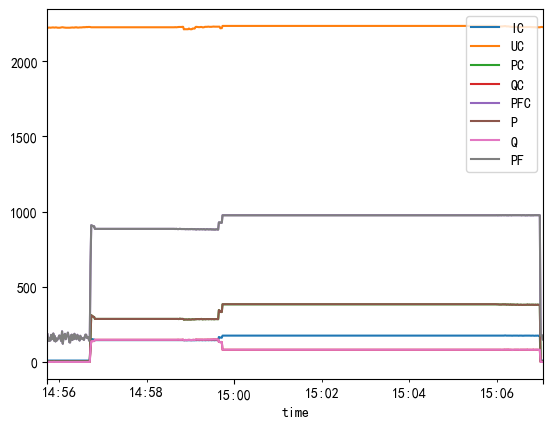

In [8]:
# 2 可视化查看抽样后的数据变化情况
# 合并的图
tmp_yd1_new.resample('S').fillna(method='bfill')\
[['IC', 'UC', 'PC', 'QC', 'PFC', 'P', 'Q', 'PF']].plot.line()

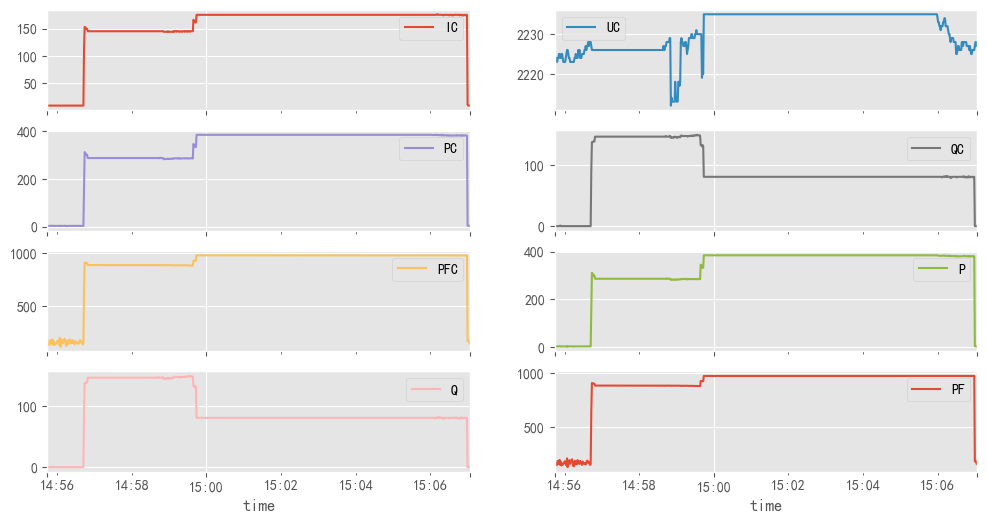

In [9]:
# 分开的图
plt.style.use('ggplot')
tmp_yd1_new.resample('S').fillna(method='bfill')\
[['IC', 'UC', 'PC', 'QC', 'PFC', 'P', 'Q', 'PF']].plot.line(
    subplots=True, layout=(4,2),figsize=(12,6))
plt.show()

In [10]:
# 11 种设备的设备数据变换曲线
def draw_plot_sb(yd_type='YD1'):
    # 1 提取YD1的设备数据
    tmp = all_data['设备数据']
    ind = tmp['yd_type'] == yd_type
    tmp_yd1 = tmp.loc[ind, :]
    tmp_yd1['time'] = pd.to_datetime(tmp_yd1['time'])
    tmp_yd1_new = tmp_yd1.set_index('time')

    plt.style.use('ggplot')
    tmp_yd1_new.resample('S').fillna(method='bfill') \
        [['IC', 'UC', 'PC', 'P', 'QC', 'Q', 'PFC', 'PF']].plot.line(
        subplots=True, layout=(4, 2), figsize=(12, 6))
    plt.title(f'{yd_type}')
    plt.savefig(f'{yd_type}_sb.png')
    plt.show()
    plt.pause(1)
    plt.close()

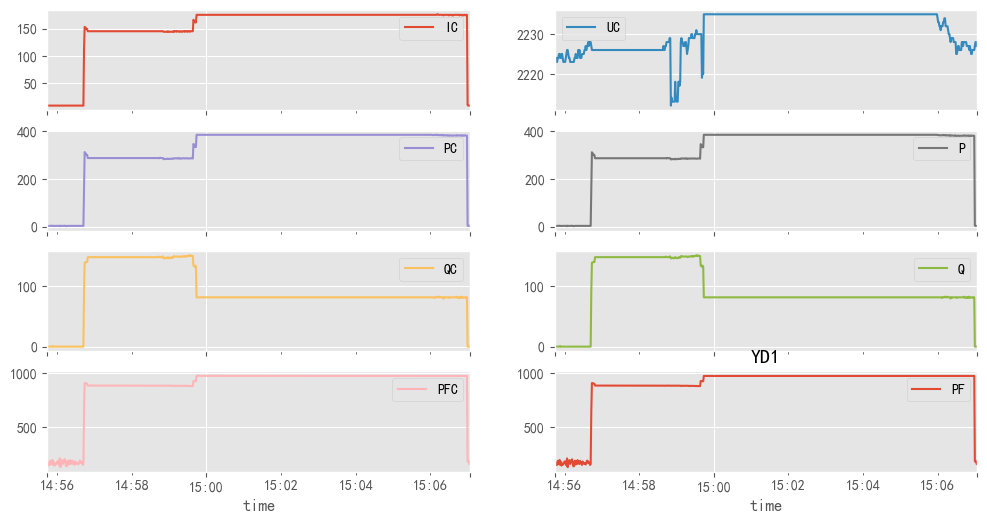

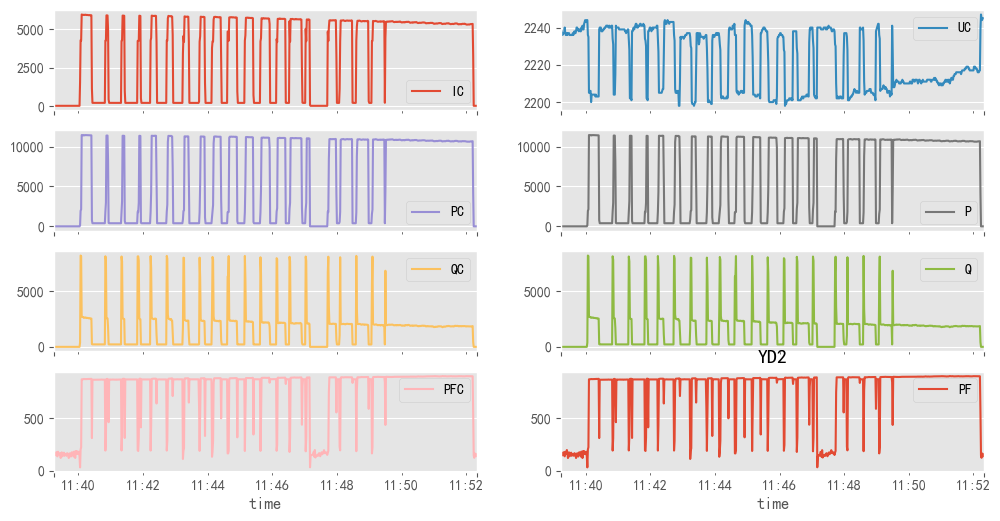

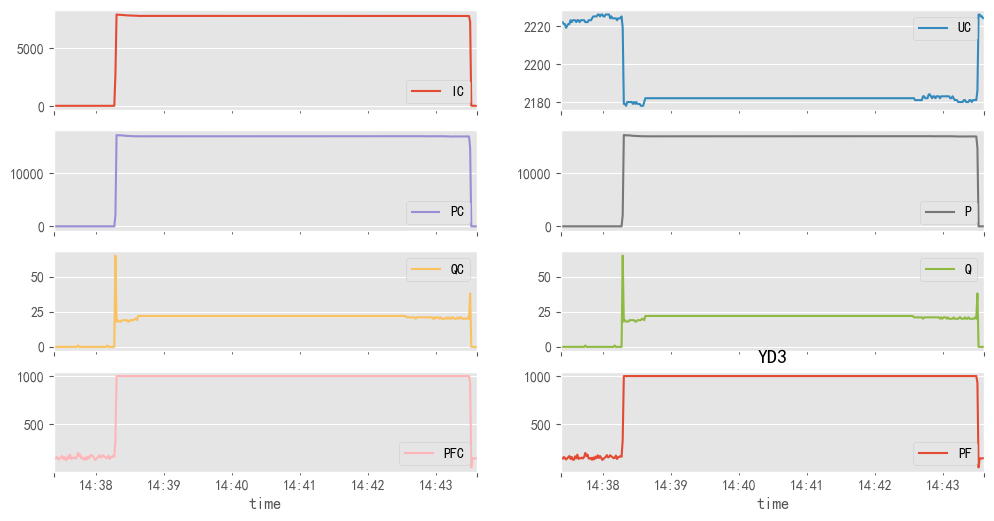

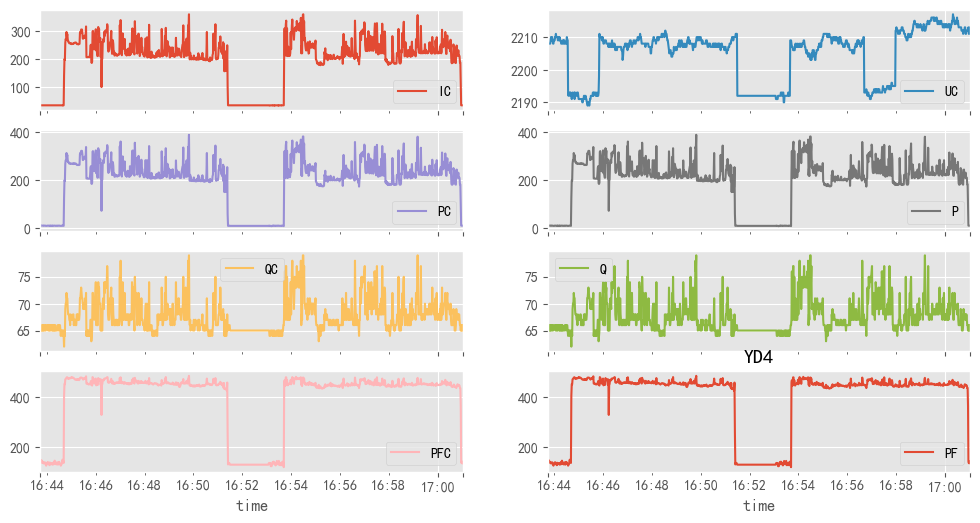

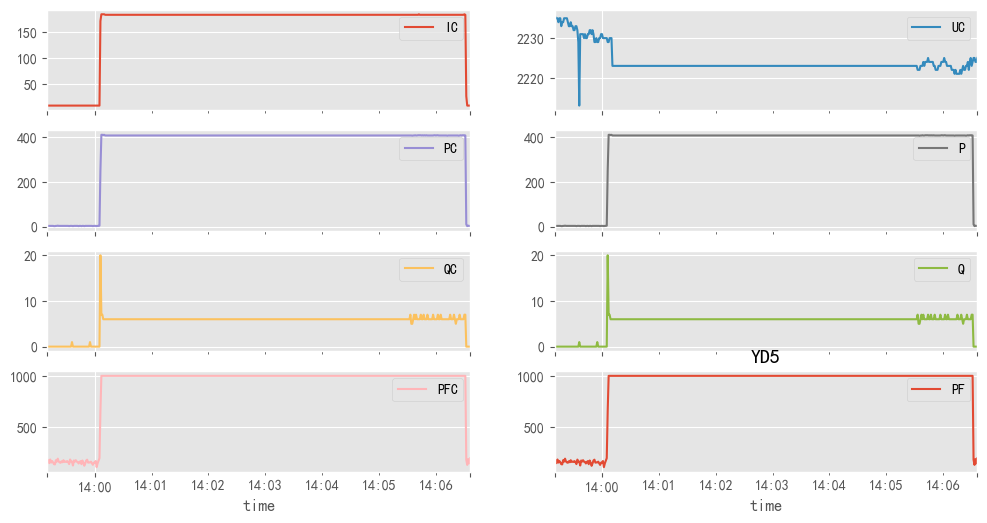

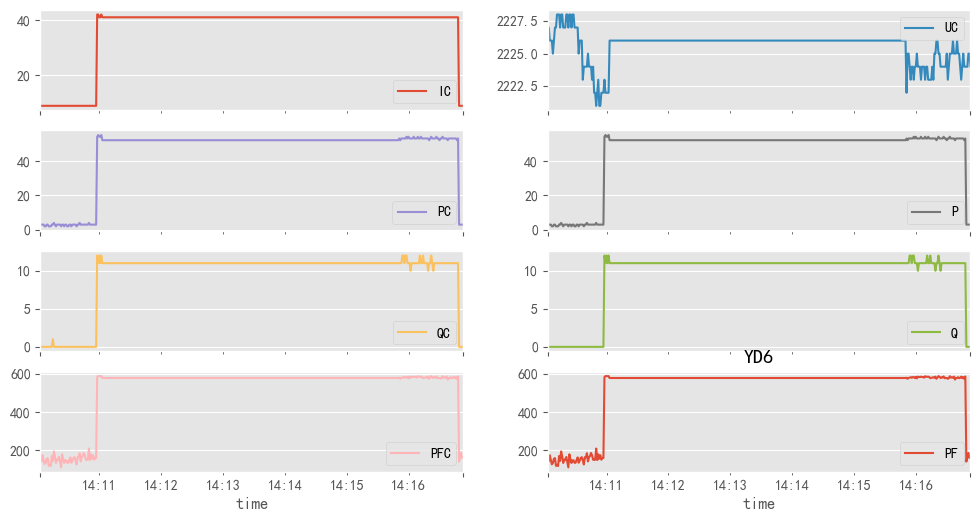

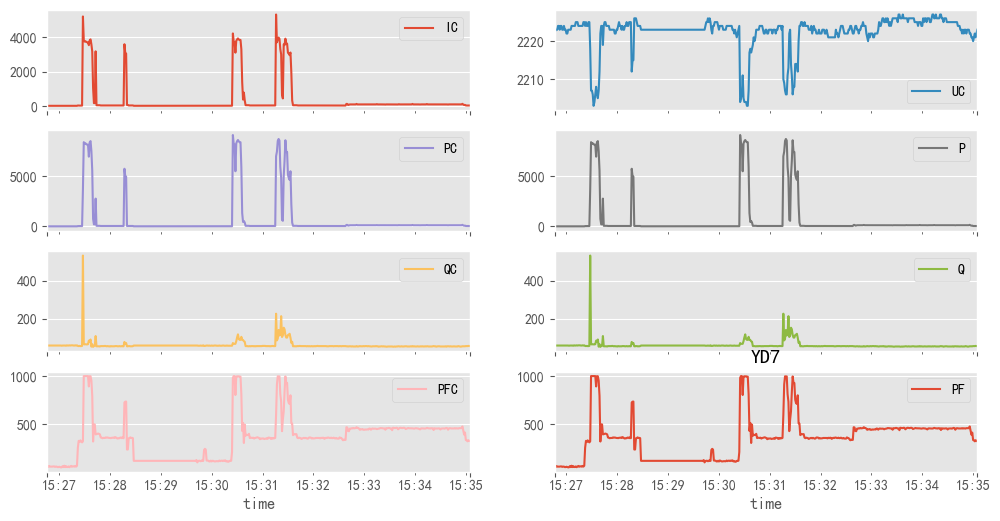

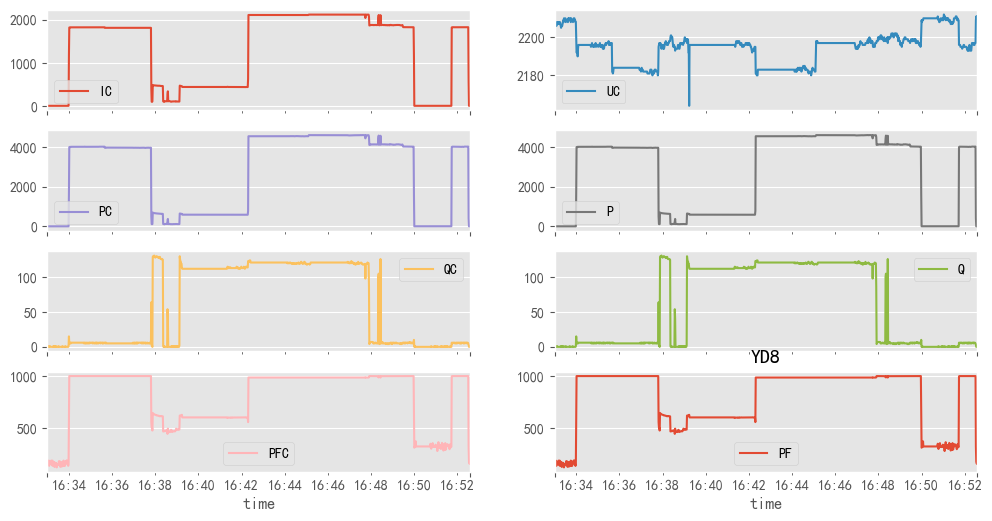

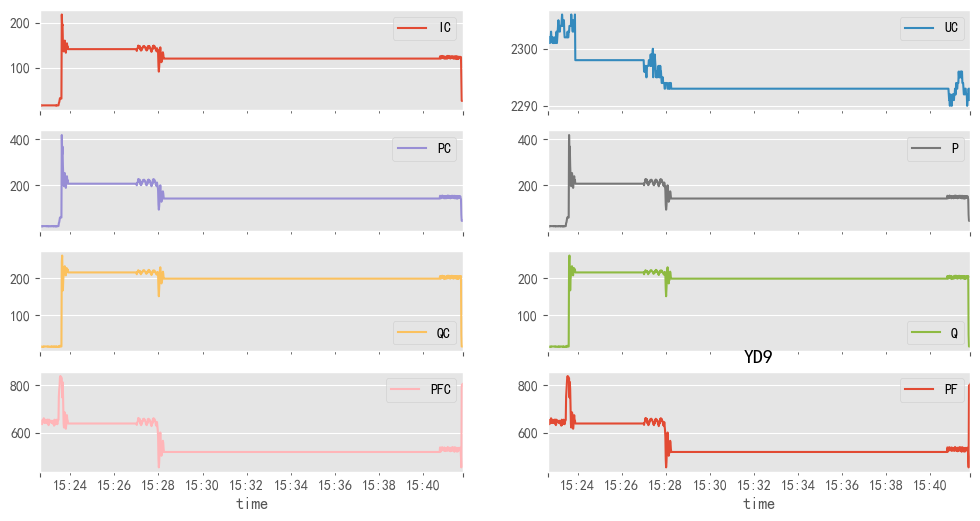

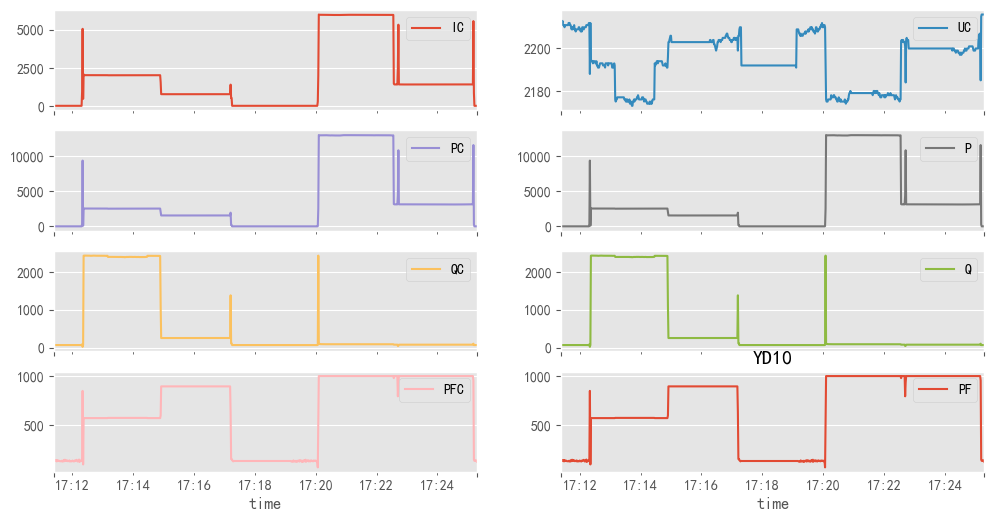

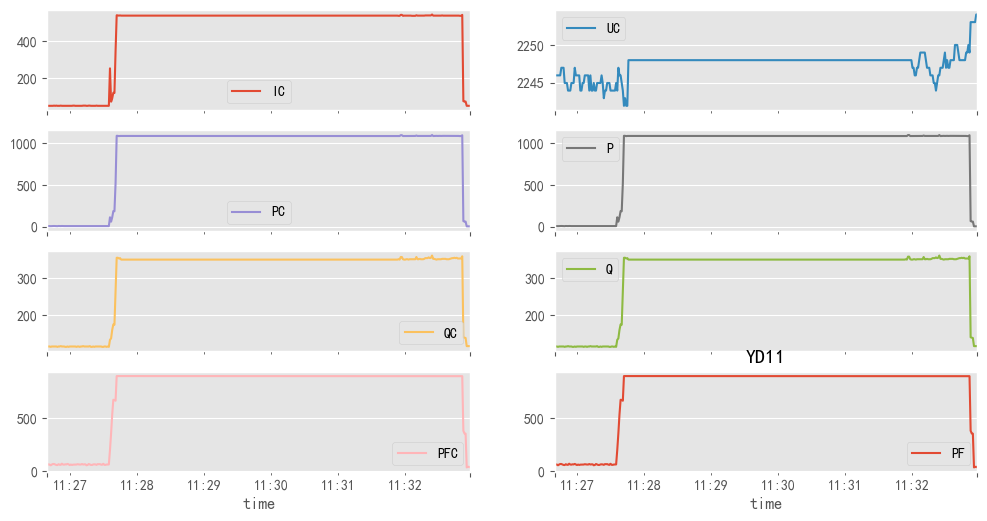

In [11]:
for i in range(1,12):
    draw_plot_sb(f'YD{i}')

In [12]:
# 周期数据可视化
# 1 提取YD1的周波数据
yd_type = 'YD2'
tmp = all_data['周波数据']
ind = tmp['yd_type'] == yd_type
tmp_yd1 = tmp.loc[ind, :]
tmp_yd1['time'] = pd.to_datetime(tmp_yd1['time'])
tmp_yd2_new = tmp_yd1.set_index('time')

In [13]:
# 落地风扇周波数据种电流随时间变化的情况
png_save_path = 'tmp'
num, _ = tmp_yd1_new.shape
min_, max_ = 0, tmp_yd2_new.iloc[:, :128].max().max()

In [ ]:
# 绘图
for i in range(num):  # 循环数据行
    tmp_yd1_new.iloc[i, :128].T.plot.line(legend=False)  # 绘制图形
    # 添加标题
    plt.title(f'{yd_type}_周波_{"IC"}_{str(tmp_yd2_new.index[i]).split(".")[0]}')
    # 设置y轴范围
    plt.ylim(min_, max_ + 0.1)
    plt.savefig(f'{png_save_path}/{i}.png')  # 保存图片
    plt.show()
    plt.pause(0.1)  # 每次显示图片的暂停时间
    display.clear_output(wait=True)
plt.close()

In [ ]:
# 生成gif
import imageio
with imageio.get_writer('tmp/YD2_zb_IC.gif',model='I') as w:
    for i in range(num):
        img = imageio.imread(f'{png_save_path}/{i}.png')
        w.append_data(img)

In [ ]:
# 绘制电压gif
# 落地风扇周波数据种电流随时间变化的情况
png_save_path = 'tmp'
num, _ = tmp_yd2_new.shape
min_, max_ = 0, tmp_yd2_new.iloc[:, 128:-2].max().max()

In [ ]:
# 绘图
for i in range(num):  # 循环数据行
    tmp_yd2_new.iloc[i, 128:-2].T.plot.line(legend=False)  # 绘制图形
    # 添加标题
    plt.title(f'{yd_type}_周波_{"UC"}_{str(tmp_yd2_new.index[i]).split(".")[0]}')
    # 设置y轴范围
    plt.ylim(min_, max_*1.05)
    plt.savefig(f'{png_save_path}/{i}.png')  # 保存图片
    plt.show()
    # plt.pause(0.1)  # 每次显示图片的暂停时间
    # display.clear_output(wait=True)
plt.close()

In [ ]:
# 生成gif
import imageio
with imageio.get_writer('tmp/YD2_zb_UC.gif',model='I') as w:
    for i in range(num):
        img = imageio.imread(f'{png_save_path}/{i}.png')
        w.append_data(img)

In [ ]:
# 谐波数据
import shutil

In [ ]:
def draw_xb_gif(yd_type='YD1', remove=True):
    # 1 提取各设备谐波数据
    tmp = all_data['谐波数据']
    ind = tmp['yd_type'] == yd_type
    tmp_yd1 = tmp.loc[ind, :]
    tmp_yd1['time'] = pd.to_datetime(tmp_yd1['time'])
    tmp_yd1_new = tmp_yd1.set_index('time')
    
    png_save_path = './tmp_png' 
    if not os.path.exists(png_save_path):
        os.makedirs(png_save_path) # 判断路径是否存在，若不存在则创建
        
    # 2.1 IC电流
    num, _ = tmp_yd1_new.shape
    min_, max_ = 0, tmp_yd1_new.iloc[:,:50].max().max()
    for i in range(num): # 循环数据行
        tmp_yd1_new.iloc[i,:50].T.plot.line(legend=False) # 绘制图形
        # 添加标题
        plt.title(f'{yd_type}_谐波_{"IC"}_{str(tmp_yd1_new.index[i]).split(".")[0]}')
        # 设置y轴范围
        plt.ylim(min_, max_+0.1)
        plt.savefig(f'{png_save_path}/{i}.png') # 保存图片
        plt.show()
        plt.pause(0.1) # 每次显示图片的暂停时间
        display.clear_output(wait=True)
    # 生成gif
    with imageio.get_writer(f'./tmp/{yd_type}_xb_IC.gif',mode='I') as w:
        for i in range(num):
            img = imageio.imread(f'{png_save_path}/{i}.png')
            w.append_data(img)
    # 2.2 电压
    min_, max_ = 0, tmp_yd1_new.iloc[:,50:-2].max().max()
    for i in range(num): # 循环数据行
        tmp_yd1_new.iloc[i,50:-2].T.plot.line(legend=False) # 绘制图形
        # 添加标题
        plt.title(f'{yd_type}_谐波_{"UC"}_{str(tmp_yd1_new.index[i]).split(".")[0]}')
        # 设置y轴范围
        plt.ylim(min_, max_*1.05)
        plt.savefig(f'{png_save_path}/{i}.png') # 保存图片
        plt.show()
        #plt.pause(0.1) # 每次显示图片的暂停时间
        display.clear_output(wait=True)
    # 生成gif
    with imageio.get_writer(f'./tmp/{yd_type}_xb_UC.gif',mode='I') as w:
        for i in range(num):
            img = imageio.imread(f'{png_save_path}/{i}.png')
            w.append_data(img)
    # 3 清空图片文件夹
    if remove:
        shutil.rmtree(png_save_path)

# 数据检查

In [ ]:
# 数据检查
# 空值
for i in ['设备数据', '周波数据', '谐波数据']:
    print(i, all_data[i].isnull().sum().sum())

In [ ]:
# 重复值
for i in ['设备数据', '周波数据', '谐波数据']:
    print(i, all_data[i].duplicated().sum())

In [ ]:
# 存储字典到文件
import pickle
with open('./all_data.pickle', 'wb') as f:
    pickle.dump(all_data, f)

In [ ]:
def fix_na(data):
    tmp2 = data.copy()
    # 1 时间格式转换
    tmp2['time'] = pd.to_datetime(data['time'])
    # 2 时间作为索引
    tmp2 = tmp2.set_index('time')
    # 3 重采样
    tmp3 = tmp2.resample('S').max()
    # 4 缺失值处理
    ind = tmp3.iloc[:,0].isna()
    ind2 = pd.Series(ind[ind].index, index= ind[ind].index).diff().dt.seconds
    ind3 = ind2.loc[ind2 == 1].index
    # 删除
    tmp4 = tmp3.drop(ind3)
    tmp_res = tmp4.fillna(method='ffill')
    return tmp_res

In [ ]:
# 构建一个空的字典，后面跟着df
all_data_fix_na = {i:pd.DataFrame() for i in ['设备数据', '周波数据', '谐波数据']}
# 循环处理11个数据
for i in [f'YD{i}' for i in range(1,12)]:
    for j in ['设备数据', '周波数据', '谐波数据']:
        # 提取对应数据
        tmp = all_data[j].loc[all_data[j]['yd_type']==i,:]
        # 处理
        all_data_fix_na[j] = pd.concat([all_data_fix_na[j],fix_na(tmp)])
# 输出11个数据合并后的数据大小
for i in ['设备数据', '周波数据', '谐波数据']:
    print(i, all_data[i].shape, all_data_fix_na[i].shape)

# 特征构建

In [ ]:
# 获取设备数据
feature1 =all_data_fix_na['设备数据'][['IC','UC','PC','QC','PFC','label','yd_type']]
feature1

In [ ]:
# 提取周波数据
tmp = all_data_fix_na['周波数据']
cols = [i for i in tmp.columns if 'UC' not in i]
feature2 = tmp[cols]

In [ ]:
# 提取周波数据的波峰波谷
feature21 = pd.DataFrame([], columns=['波峰','波谷'])
from sklearn.cluster import KMeans
import numpy as np
for i in range(len(feature2)):
    d = feature2.iloc[i,:-2].astype(float)
    model = KMeans(n_clusters=2)
    model.fit(d.values.reshape((-1,1)))
    tmp = model.cluster_centers_
    feature21.loc[d.name, '波峰'] = tmp.max() # 波峰
    feature21.loc[d.name, '波谷'] = tmp.min() # 波谷
    feature21.loc[d.name,'波峰_num'] = sum(model.labels_ == tmp.argmax())
    feature21.loc[d.name,'波谷_num'] = sum(model.labels_ == tmp.argmin())

In [ ]:
feature21 

In [ ]:
# 处理谐波数据
tmp = all_data_fix_na['谐波数据']
cols = [i for i in tmp.columns if 'UC' not in i]
feature3 = tmp[cols]
tmp = feature3.drop(['label','yd_type'],axis=1)
feature31 = tmp.apply(lambda d: [d.max(), d.mean(), d.std(),
                   d.kurt(),  #数据的峰度
                   d.skew(),# 数据的偏度
                   d.median(),
                   d.quantile(0.9)  #分位数
                                 ], axis=1 )
feature31_new = pd.DataFrame(
                list(feature31.values),index=feature31.index,
                columns=['最大值','均值','标准差','峰度','偏度','中位数','0.9分位数'])

In [ ]:
feature31_new

In [ ]:
# 合并筛选后的特征
data_feature_fe = pd.concat([feature1,feature21, feature31_new],axis=1)

# 原始特征
data_feature = pd.concat([feature1, feature2.drop(['label','yd_type'],axis=1),
                          feature3.drop(['label','yd_type'],axis=1)],axis=1)
data_feature

In [ ]:
data_feature_fe1 = data_feature_fe.drop(['label', 'yd_type'], axis=1, inplace=False)
data_feature_fe

In [ ]:
# 保存数据
data_feature.to_csv('./tmp/data_feature.csv',encoding='utf-8-sig')
data_feature_fe.to_csv('./tmp/data_feature_fe.csv',encoding='utf-8-sig')

# 构建模型

In [ ]:
# 提取原始数据特征
data_feature = pd.read_csv('./tmp/data_feature.csv')
data_feature['time'] = pd.to_datetime(data_feature['time'])
data_feature = data_feature.set_index('time')

In [ ]:
# 拆分特征与标签
cols = ['label','yd_type']
x ,y = data_feature.drop(cols, axis=1), data_feature['label']
print(x.shape, y.shape)
print(x.describe())
# 数据标准化
from sklearn.preprocessing import StandardScaler
scale =StandardScaler()
scale.fit(x)
x_ss = scale.transform(x)

In [ ]:
# 模型构建
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_ss, y)
model.score(x_ss, y)

# 提取筛选后的特征数据
data_feature_fe = pd.read_csv('./tmp/data_feature_fe.csv')
data_feature_fe['time'] = pd.to_datetime(data_feature_fe.iloc[:,0])
data_feature_fe = data_feature_fe.iloc[:,1:].set_index('time')
# 拆分数据
cols = ['label','yd_type']
x ,y = data_feature_fe.drop(cols, axis=1), data_feature_fe['label']
print(x.shape, y.shape)
print(x.describe())

In [ ]:
# 数据标准化
from sklearn.preprocessing import StandardScaler
scale0 = StandardScaler()
scale0.fit(x)
x0_ss = scale0.transform(x)
# 模型构建
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x0_ss, y)
model_knn.score(x0_ss, y)

# 保存模型
from joblib import dump
dump(scale0,'scale_ss')
dump(model_knn,'model_knn')

In [ ]:
model_knn.score(x0_ss, y)

In [ ]:
model.score(x_ss, y)